# GOAL: Create a master census tract file made up only of census tracts with common boundaries across all years

### STEP 1: import libraries and prepare the data

In [1]:
#Libraries
import geopandas as gpd
import numpy as np
import pandas as pd

#Read in data
#SHP 1940,2010, 2015, and 2020
#Chicago
chi1940 = gpd.read_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/Redlining/Data/Census/Cleaned/census1940_Chicago_20241009.shp')
chi2010 = gpd.read_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/Redlining/Data/Census/Cleaned/census2010_Chicago_20240930.shp')
chi2015 = gpd.read_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/Redlining/Data/Census/Cleaned/census2015_Chicago_20240930.shp')
chi2020 = gpd.read_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/Redlining/Data/Census/Cleaned/census2020_Chicago_20240930.shp')

In [2]:
#Check projections
print(chi1940.crs)
print(chi2010.crs)
print(chi2015.crs)
print(chi2020.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","42

### STEP 2: create clusters and combine data (Chicago)

In [3]:
#Makes distance matrix
big_dfCHI = gpd.GeoDataFrame()
all_dfCHI = [chi1940,chi2010,chi2015,chi2020]
for df in all_dfCHI:
    print(df.index)
    #big_dfCHI = big_dfCHI.append(df, ignore_index=True)
    big_dfCHI = pd.concat([big_dfCHI,df], ignore_index=True)
len(big_dfCHI.index)
# Optimized Version
def contains(track1, track2):
    '''
    Assumes track1 and track2 are just the geometries
    '''
    if(track1.intersects(track2)):
        intersection = track1.intersection(track2)
        return intersection.area/track1.area
    else:
        return 0

ious = np.zeros((len(big_dfCHI.index), len(big_dfCHI.index)))
just_geos = big_dfCHI['geometry'].values

for i, row_i in enumerate(just_geos):
    print(i, '/', len(big_dfCHI.index))
    for j, row_j in enumerate(just_geos):
        if(i != j):
            ious[i, j] = contains(row_i, row_j)

RangeIndex(start=0, stop=935, step=1)
RangeIndex(start=0, stop=1318, step=1)
RangeIndex(start=0, stop=1318, step=1)
RangeIndex(start=0, stop=1331, step=1)
0 / 4902
1 / 4902
2 / 4902
3 / 4902
4 / 4902
5 / 4902
6 / 4902
7 / 4902
8 / 4902
9 / 4902
10 / 4902
11 / 4902
12 / 4902
13 / 4902
14 / 4902
15 / 4902
16 / 4902
17 / 4902
18 / 4902
19 / 4902
20 / 4902
21 / 4902
22 / 4902
23 / 4902
24 / 4902
25 / 4902
26 / 4902
27 / 4902
28 / 4902
29 / 4902
30 / 4902
31 / 4902
32 / 4902
33 / 4902
34 / 4902
35 / 4902
36 / 4902
37 / 4902
38 / 4902
39 / 4902
40 / 4902
41 / 4902
42 / 4902
43 / 4902
44 / 4902
45 / 4902
46 / 4902
47 / 4902
48 / 4902
49 / 4902
50 / 4902
51 / 4902
52 / 4902
53 / 4902
54 / 4902
55 / 4902
56 / 4902
57 / 4902
58 / 4902
59 / 4902
60 / 4902
61 / 4902
62 / 4902
63 / 4902
64 / 4902
65 / 4902
66 / 4902
67 / 4902
68 / 4902
69 / 4902
70 / 4902
71 / 4902
72 / 4902
73 / 4902
74 / 4902
75 / 4902
76 / 4902
77 / 4902
78 / 4902
79 / 4902
80 / 4902
81 / 4902
82 / 4902
83 / 4902
84 / 4902
85 / 

741 / 4902
742 / 4902
743 / 4902
744 / 4902
745 / 4902
746 / 4902
747 / 4902
748 / 4902
749 / 4902
750 / 4902
751 / 4902
752 / 4902
753 / 4902
754 / 4902
755 / 4902
756 / 4902
757 / 4902
758 / 4902
759 / 4902
760 / 4902
761 / 4902
762 / 4902
763 / 4902
764 / 4902
765 / 4902
766 / 4902
767 / 4902
768 / 4902
769 / 4902
770 / 4902
771 / 4902
772 / 4902
773 / 4902
774 / 4902
775 / 4902
776 / 4902
777 / 4902
778 / 4902
779 / 4902
780 / 4902
781 / 4902
782 / 4902
783 / 4902
784 / 4902
785 / 4902
786 / 4902
787 / 4902
788 / 4902
789 / 4902
790 / 4902
791 / 4902
792 / 4902
793 / 4902
794 / 4902
795 / 4902
796 / 4902
797 / 4902
798 / 4902
799 / 4902
800 / 4902
801 / 4902
802 / 4902
803 / 4902
804 / 4902
805 / 4902
806 / 4902
807 / 4902
808 / 4902
809 / 4902
810 / 4902
811 / 4902
812 / 4902
813 / 4902
814 / 4902
815 / 4902
816 / 4902
817 / 4902
818 / 4902
819 / 4902
820 / 4902
821 / 4902
822 / 4902
823 / 4902
824 / 4902
825 / 4902
826 / 4902
827 / 4902
828 / 4902
829 / 4902
830 / 4902
831 / 4902

1449 / 4902
1450 / 4902
1451 / 4902
1452 / 4902
1453 / 4902
1454 / 4902
1455 / 4902
1456 / 4902
1457 / 4902
1458 / 4902
1459 / 4902
1460 / 4902
1461 / 4902
1462 / 4902
1463 / 4902
1464 / 4902
1465 / 4902
1466 / 4902
1467 / 4902
1468 / 4902
1469 / 4902
1470 / 4902
1471 / 4902
1472 / 4902
1473 / 4902
1474 / 4902
1475 / 4902
1476 / 4902
1477 / 4902
1478 / 4902
1479 / 4902
1480 / 4902
1481 / 4902
1482 / 4902
1483 / 4902
1484 / 4902
1485 / 4902
1486 / 4902
1487 / 4902
1488 / 4902
1489 / 4902
1490 / 4902
1491 / 4902
1492 / 4902
1493 / 4902
1494 / 4902
1495 / 4902
1496 / 4902
1497 / 4902
1498 / 4902
1499 / 4902
1500 / 4902
1501 / 4902
1502 / 4902
1503 / 4902
1504 / 4902
1505 / 4902
1506 / 4902
1507 / 4902
1508 / 4902
1509 / 4902
1510 / 4902
1511 / 4902
1512 / 4902
1513 / 4902
1514 / 4902
1515 / 4902
1516 / 4902
1517 / 4902
1518 / 4902
1519 / 4902
1520 / 4902
1521 / 4902
1522 / 4902
1523 / 4902
1524 / 4902
1525 / 4902
1526 / 4902
1527 / 4902
1528 / 4902
1529 / 4902
1530 / 4902
1531 / 4902
1532

2135 / 4902
2136 / 4902
2137 / 4902
2138 / 4902
2139 / 4902
2140 / 4902
2141 / 4902
2142 / 4902
2143 / 4902
2144 / 4902
2145 / 4902
2146 / 4902
2147 / 4902
2148 / 4902
2149 / 4902
2150 / 4902
2151 / 4902
2152 / 4902
2153 / 4902
2154 / 4902
2155 / 4902
2156 / 4902
2157 / 4902
2158 / 4902
2159 / 4902
2160 / 4902
2161 / 4902
2162 / 4902
2163 / 4902
2164 / 4902
2165 / 4902
2166 / 4902
2167 / 4902
2168 / 4902
2169 / 4902
2170 / 4902
2171 / 4902
2172 / 4902
2173 / 4902
2174 / 4902
2175 / 4902
2176 / 4902
2177 / 4902
2178 / 4902
2179 / 4902
2180 / 4902
2181 / 4902
2182 / 4902
2183 / 4902
2184 / 4902
2185 / 4902
2186 / 4902
2187 / 4902
2188 / 4902
2189 / 4902
2190 / 4902
2191 / 4902
2192 / 4902
2193 / 4902
2194 / 4902
2195 / 4902
2196 / 4902
2197 / 4902
2198 / 4902
2199 / 4902
2200 / 4902
2201 / 4902
2202 / 4902
2203 / 4902
2204 / 4902
2205 / 4902
2206 / 4902
2207 / 4902
2208 / 4902
2209 / 4902
2210 / 4902
2211 / 4902
2212 / 4902
2213 / 4902
2214 / 4902
2215 / 4902
2216 / 4902
2217 / 4902
2218

2821 / 4902
2822 / 4902
2823 / 4902
2824 / 4902
2825 / 4902
2826 / 4902
2827 / 4902
2828 / 4902
2829 / 4902
2830 / 4902
2831 / 4902
2832 / 4902
2833 / 4902
2834 / 4902
2835 / 4902
2836 / 4902
2837 / 4902
2838 / 4902
2839 / 4902
2840 / 4902
2841 / 4902
2842 / 4902
2843 / 4902
2844 / 4902
2845 / 4902
2846 / 4902
2847 / 4902
2848 / 4902
2849 / 4902
2850 / 4902
2851 / 4902
2852 / 4902
2853 / 4902
2854 / 4902
2855 / 4902
2856 / 4902
2857 / 4902
2858 / 4902
2859 / 4902
2860 / 4902
2861 / 4902
2862 / 4902
2863 / 4902
2864 / 4902
2865 / 4902
2866 / 4902
2867 / 4902
2868 / 4902
2869 / 4902
2870 / 4902
2871 / 4902
2872 / 4902
2873 / 4902
2874 / 4902
2875 / 4902
2876 / 4902
2877 / 4902
2878 / 4902
2879 / 4902
2880 / 4902
2881 / 4902
2882 / 4902
2883 / 4902
2884 / 4902
2885 / 4902
2886 / 4902
2887 / 4902
2888 / 4902
2889 / 4902
2890 / 4902
2891 / 4902
2892 / 4902
2893 / 4902
2894 / 4902
2895 / 4902
2896 / 4902
2897 / 4902
2898 / 4902
2899 / 4902
2900 / 4902
2901 / 4902
2902 / 4902
2903 / 4902
2904

3505 / 4902
3506 / 4902
3507 / 4902
3508 / 4902
3509 / 4902
3510 / 4902
3511 / 4902
3512 / 4902
3513 / 4902
3514 / 4902
3515 / 4902
3516 / 4902
3517 / 4902
3518 / 4902
3519 / 4902
3520 / 4902
3521 / 4902
3522 / 4902
3523 / 4902
3524 / 4902
3525 / 4902
3526 / 4902
3527 / 4902
3528 / 4902
3529 / 4902
3530 / 4902
3531 / 4902
3532 / 4902
3533 / 4902
3534 / 4902
3535 / 4902
3536 / 4902
3537 / 4902
3538 / 4902
3539 / 4902
3540 / 4902
3541 / 4902
3542 / 4902
3543 / 4902
3544 / 4902
3545 / 4902
3546 / 4902
3547 / 4902
3548 / 4902
3549 / 4902
3550 / 4902
3551 / 4902
3552 / 4902
3553 / 4902
3554 / 4902
3555 / 4902
3556 / 4902
3557 / 4902
3558 / 4902
3559 / 4902
3560 / 4902
3561 / 4902
3562 / 4902
3563 / 4902
3564 / 4902
3565 / 4902
3566 / 4902
3567 / 4902
3568 / 4902
3569 / 4902
3570 / 4902
3571 / 4902
3572 / 4902
3573 / 4902
3574 / 4902
3575 / 4902
3576 / 4902
3577 / 4902
3578 / 4902
3579 / 4902
3580 / 4902
3581 / 4902
3582 / 4902
3583 / 4902
3584 / 4902
3585 / 4902
3586 / 4902
3587 / 4902
3588

4190 / 4902
4191 / 4902
4192 / 4902
4193 / 4902
4194 / 4902
4195 / 4902
4196 / 4902
4197 / 4902
4198 / 4902
4199 / 4902
4200 / 4902
4201 / 4902
4202 / 4902
4203 / 4902
4204 / 4902
4205 / 4902
4206 / 4902
4207 / 4902
4208 / 4902
4209 / 4902
4210 / 4902
4211 / 4902
4212 / 4902
4213 / 4902
4214 / 4902
4215 / 4902
4216 / 4902
4217 / 4902
4218 / 4902
4219 / 4902
4220 / 4902
4221 / 4902
4222 / 4902
4223 / 4902
4224 / 4902
4225 / 4902
4226 / 4902
4227 / 4902
4228 / 4902
4229 / 4902
4230 / 4902
4231 / 4902
4232 / 4902
4233 / 4902
4234 / 4902
4235 / 4902
4236 / 4902
4237 / 4902
4238 / 4902
4239 / 4902
4240 / 4902
4241 / 4902
4242 / 4902
4243 / 4902
4244 / 4902
4245 / 4902
4246 / 4902
4247 / 4902
4248 / 4902
4249 / 4902
4250 / 4902
4251 / 4902
4252 / 4902
4253 / 4902
4254 / 4902
4255 / 4902
4256 / 4902
4257 / 4902
4258 / 4902
4259 / 4902
4260 / 4902
4261 / 4902
4262 / 4902
4263 / 4902
4264 / 4902
4265 / 4902
4266 / 4902
4267 / 4902
4268 / 4902
4269 / 4902
4270 / 4902
4271 / 4902
4272 / 4902
4273

4876 / 4902
4877 / 4902
4878 / 4902
4879 / 4902
4880 / 4902
4881 / 4902
4882 / 4902
4883 / 4902
4884 / 4902
4885 / 4902
4886 / 4902
4887 / 4902
4888 / 4902
4889 / 4902
4890 / 4902
4891 / 4902
4892 / 4902
4893 / 4902
4894 / 4902
4895 / 4902
4896 / 4902
4897 / 4902
4898 / 4902
4899 / 4902
4900 / 4902
4901 / 4902


In [4]:
#Determines connectivity
import networkx as nx

from shapely.geometry import Polygon
#from shapely.ops import cascaded_union
from shapely.ops import unary_union

aff_matrix = ious > 0.5
graph = nx.Graph(aff_matrix)
connected = nx.connected_components(graph)
print(connected)

#for idx, cluster in enumerate(connected):
#    #if(len(list(cluster)) > 10):
#    print(idx, cluster)
#    big_df.loc[list(cluster), 'geometry'].boundary.plot()
    
#    cluster_df = big_df.loc[list(cluster)]
    
#    #for each cluster take the union of all polygons and sum the census data
#    combine = gpd.GeoSeries(cascaded_union(cluster_df['geometry']))
#    combine.boundary.plot()
    
#after the loop, run some sort of spatial cleaning rules to make sure no polygons overlap      


<generator object connected_components at 0x00000260BE082110>


In [5]:
#for idx, cluster in enumerate(connected):
#    print(idx, cluster)
    
#for i in big_dfCHI.index:
#    print(i)

big_dfCHI.loc[1833]

GISJOIN                                          G1700310817200
STATE_y                                                     NaN
COUNTY_y                                                    NaN
YEAR                                                  2006-2010
totPop                                                     4645
homeVal                                                172800.0
raceW                                                       310
raceNW                                                      NaN
raceB                                                      3907
raceFBW                                                     NaN
empM                                                        NaN
empF                                                        NaN
eduSum                                                     2864
eduHS                                                       NaN
hoUnitT                                                    1818
homeNRep                                

In [6]:
# Iterate over each cluster, make the best_year megatracts, and add in yearly census data
target_time = '2016-2020'
megatract_DFCHI = gpd.GeoDataFrame()

for idx, cluster in enumerate(connected):
    #if(len(list(cluster)) > 10):
    print(idx, cluster)
    #big_df.loc[list(cluster), 'geometry'].boundary.plot()
    
    cluster_df = big_dfCHI.loc[list(cluster)]
    target_year_cluster = cluster_df[cluster_df['YEAR'] == target_time]
    
    if(len(target_year_cluster) > 0):
        #for each cluster take the union of all polygons and sum the census data
        #combined = gpd.GeoSeries(cascaded_union(target_year_cluster['geometry']))
        combined = gpd.GeoSeries(unary_union(target_year_cluster['geometry']))
        
        for year in cluster_df['YEAR'].unique():
            cluster_year_df = cluster_df[cluster_df['YEAR'] == year]
            new_row = gpd.GeoDataFrame(combined)
            new_row = new_row.rename(columns={0:'geometry'}).set_geometry('geometry')
            
            # Sum all columns
            #Race:
            new_row['totPop'] = cluster_year_df['totPop'].sum() 
            new_row['raceW'] = cluster_year_df['raceW'].sum() 
            new_row['raceB'] = cluster_year_df['raceB'].sum()
            new_row['raceN'] = cluster_year_df['raceN'].sum()
            new_row['raceA'] = cluster_year_df['raceA'].sum()
            new_row['raceP'] = cluster_year_df['raceP'].sum()
            new_row['raceO'] = cluster_year_df['raceO'].sum()
            new_row['race2'] = cluster_year_df['race2'].sum()
            new_row['raceNW'] = cluster_year_df['raceNW'].sum() #1940
            new_row['raceFBW'] = cluster_year_df['raceFBW'].sum() #1940
            
            #Hispanic Origin: 
            new_row['orgnHisp'] = cluster_year_df['orgnHisp'].sum()
            
            #Education: 
            new_row['eduSum'] = cluster_year_df['eduSum'].sum()
            new_row['gteBach'] = cluster_year_df['gteBach'].sum()
            new_row['eduHS'] = cluster_year_df['eduHS'].sum() #1940
            
            #Employment:
            new_row['empM'] = cluster_year_df['empM'].sum() #1940
            new_row['empF'] = cluster_year_df['empF'].sum() #1940
        
            #Median income
            new_row['medInc'] = cluster_year_df['medInc'].mean()
        
            #Median rent
            new_row['medRent'] = cluster_year_df['medRent'].mean()
            
            #Median home value
            new_row['homeVal'] = cluster_year_df['homeVal'].mean()
            
            #Housing units:
            new_row['hoUnitT'] = cluster_year_df['hoUnitT'].sum()
            new_row['occHou'] = cluster_year_df['occHou'].sum()
            new_row['vacHou'] = cluster_year_df['vacHou'].sum()
            new_row['ownHou'] = cluster_year_df['ownHou'].sum()
            new_row['rentHou'] = cluster_year_df['rentHou'].sum()
            new_row['houGte30'] = cluster_year_df['houGte30'].sum()
            new_row['homeWRadio'] = cluster_year_df['homeWRadio'].sum() #1940
            new_row['homeRadioT'] = cluster_year_df['homeRadioT'].sum() #1940
            new_row['homeNRep'] = cluster_year_df['homeNRep'].sum() #1940
            new_row['homeRepT'] = cluster_year_df['homeRepT'].sum() #1940
            new_row['pplHoUnit'] = cluster_year_df['pplHoUnit'].sum() #1940
            
            #Median year housing built
            new_row['medYrHou'] = cluster_year_df['medYrHou'].mean()
          
            new_row['cluster_idx'] = idx
            new_row['YEAR'] = year
       
            #megatract_DFCHI = megatract_DFCHI.append(new_row,ignore_index=True)
            megatract_DFCHI = pd.concat([megatract_DFCHI, new_row] ,ignore_index=True)

0 {0, 1, 3460, 2122, 4793}
1 {2, 987, 2261, 3579}
2 {1314, 3, 2097, 2262, 2263, 3580, 3581}
3 {4, 1387, 1388, 1613, 2257, 2258, 2259, 2260, 1110, 3575, 3576, 3577, 3578}
4 {1248, 1317, 5, 2254, 2255, 3572, 3573}
5 {2256, 3574, 1612, 6}
6 {3571, 2140, 2253, 7}
7 {1536, 1537, 2274, 2275, 8, 3592, 3593}
8 {2272, 2273, 3590, 3591, 9, 2093, 2099}
9 {1539, 2276, 2277, 3594, 10, 3595, 1109}
10 {1313, 1538, 3588, 3589, 11, 2270, 2271}
11 {3587, 12, 2269, 1620}
12 {3584, 3585, 13, 2096, 1143, 2266, 2267}
13 {1745, 3586, 2268, 14}
14 {1409, 3583, 2265, 15}
15 {16, 988, 3582, 2264}
16 {2304, 17, 1051, 3622}
17 {3461, 18, 1523, 22, 4794}
18 {2305, 19, 1052, 3623}
19 {3617, 20, 24, 2299, 2205}
20 {2302, 3620, 21, 1772}
21 {3618, 3619, 1552, 23, 2300, 2301, 2111}
22 {2296, 25, 1259, 3614}
23 {2297, 26, 1557, 3615}
24 {3616, 2298, 27, 1260}
25 {1773, 28, 3621, 2303}
26 {3613, 2039, 29, 2295}
27 {2294, 1250, 3612, 30}
28 {1720, 3602, 2284, 31}
29 {32, 3601, 2283, 1044}
30 {33, 3611, 2293, 2198}
31 {34

265 {2537, 1842, 294, 3855}
266 {2168, 2536, 3854, 295}
267 {297, 1678, 3860, 2542}
268 {298, 1339, 3861, 2543}
269 {2544, 299, 2013, 3862}
270 {3872, 1498, 300, 2554}
271 {3873, 1235, 301, 2555}
272 {2553, 3871, 302, 1366}
273 {2552, 2019, 3870, 303}
274 {305, 2535, 3853, 1841}
275 {306, 3852, 2534, 1319}
276 {3553, 1507, 4882, 307, 311, 313, 314, 319}
277 {2545, 1492, 308, 3863}
278 {3864, 1849, 2546, 309}
279 {2177, 3865, 2547, 310}
280 {312, 1850, 3866, 2548}
281 {1504, 2561, 315, 3879}
282 {3880, 2562, 316, 1861}
283 {2563, 3881, 2191, 317, 318}
284 {320, 2032, 3885, 2567}
285 {321, 1251, 3884, 2566}
286 {1517, 322, 3883, 2565}
287 {3882, 323, 2564, 1862}
288 {4800, 324, 328, 3467, 1167}
289 {2568, 325, 3886, 1455}
290 {2033, 3887, 326, 2569}
291 {1456, 2570, 3888, 327}
292 {329, 3892, 2574, 1783}
293 {330, 3891, 2573, 2043}
294 {3890, 331, 2572, 1629}
295 {3889, 2571, 332, 1558}
296 {2215, 3893, 333, 2575}
297 {2576, 3894, 334, 1903}
298 {2577, 1580, 3895, 335}
299 {336, 2578, 19

521 {1033, 4075, 708, 2757}
522 {2758, 4076, 709, 2036}
523 {1058, 710, 2761, 2762, 4079, 4080, 1787}
524 {2759, 983, 4077, 711}
525 {712, 1323, 4084, 2766}
526 {1608, 713, 4078, 2760}
527 {714, 2763, 2764, 1100, 974, 2765, 4081, 4082, 4083, 1343}
528 {1381, 936, 715, 716, 2767, 2768, 4085, 4086}
529 {2769, 2076, 717, 4087}
530 {4088, 2770, 718, 1055}
531 {719, 720, 2771, 1624, 4089}
532 {721, 1875, 4092, 2774}
533 {722, 2772, 2037, 4090}
534 {723, 1532, 2773, 4091}
535 {2209, 4095, 724, 2777}
536 {4096, 2778, 725, 1303}
537 {2776, 1777, 4094, 726}
538 {4097, 2779, 1564, 727}
539 {728, 2203, 4093, 2775}
540 {832, 4901, 1547, 3570, 729, 732}
541 {1509, 3497, 730, 731, 4830}
542 {1304, 4098, 2780, 733}
543 {1063, 4101, 734, 2783}
544 {4099, 2044, 2781, 735}
545 {736, 1785, 4100, 2782}
546 {1064, 737, 2784, 4102}
547 {2785, 738, 1786, 4103}
548 {4104, 1346, 739, 2786}
549 {2217, 2787, 740, 4105}
550 {1347, 2788, 741, 742, 4106}
551 {3557, 743, 745, 749, 750, 1331, 4886}
552 {2789, 2790, 7

810 {4761, 3429, 1230}
811 {4684, 4683, 3348, 1231}
812 {1232, 3336, 4663}
813 {3048, 1233, 4369}
814 {1234, 3043, 4365}
815 {4265, 1237, 2949}
816 {4267, 1238, 2951}
817 {4592, 3266, 1242}
818 {3106, 1243, 4430}
819 {4488, 3162, 1244}
820 {4657, 3330, 1245}
821 {3408, 4739, 1246}
822 {3287, 4614, 1247}
823 {4500, 1252, 3174}
824 {3176, 1253, 4502}
825 {3394, 4725, 1254}
826 {1257, 3027, 4345}
827 {4672, 3345, 1258}
828 {4727, 3396, 1263}
829 {1264, 4763, 3431}
830 {1265, 4347, 3029}
831 {4633, 3306, 1270}
832 {4697, 3366, 1271}
833 {3224, 1277, 4550}
834 {4552, 3226, 1278}
835 {4402, 3078, 1287}
836 {1288, 3080, 4404}
837 {1290, 4349, 3031}
838 {3386, 1293, 4717}
839 {3385, 4716, 1294}
840 {1306, 2939, 4255}
841 {4264, 1307, 2948}
842 {4304, 2988, 1309}
843 {1312, 3344, 4671}
844 {3201, 1316, 4527}
845 {3248, 4574, 1318}
846 {1322, 4411, 3087}
847 {3400, 4731, 1324}
848 {4379, 1326, 3055}
849 {1328, 3050, 4371}
850 {3047, 1329, 4373, 4374, 4375}
851 {4251, 2935, 1335}
852 {4585, 1338,

1159 {4786, 2092, 3453}
1160 {4668, 3341, 2095}
1161 {3184, 2098, 4510}
1162 {4393, 2100, 3069}
1163 {3042, 4364, 2102}
1164 {2105, 3019, 4333}
1165 {2107, 3003, 4319}
1166 {4291, 2109, 2975}
1167 {2112, 4435, 3110}
1168 {2113, 4523, 3197}
1169 {4705, 2125, 3374}
1170 {2128, 4609, 3282}
1171 {4712, 2130, 3381}
1172 {4355, 3036, 2134}
1173 {2137, 4650, 3323}
1174 {2139, 4548, 3222}
1175 {4385, 3061, 2142}
1176 {2144, 3321, 4648}
1177 {2146, 3380, 4711}
1178 {3288, 2150, 4615}
1179 {3403, 4734, 2151}
1180 {4560, 2153, 3234}
1181 {3082, 2163, 4406}
1182 {3388, 2165, 4719}
1183 {4571, 3245, 2167}
1184 {2170, 3090, 4414}
1185 {3402, 2172, 4733}
1186 {4580, 3254, 2175}
1187 {2176, 3258, 4584}
1188 {4418, 2179, 3094}
1189 {3442, 2181, 4774}
1190 {2184, 4589, 3263}
1191 {4266, 2186, 2950}
1192 {2187, 4485, 3159}
1193 {3425, 4756, 2188}
1194 {4593, 3267, 2190}
1195 {2192, 4273, 2957}
1196 {2193, 4489, 3163}
1197 {2194, 4662, 3335}
1198 {3273, 2196, 4599}
1199 {2962, 4278, 2199}
1200 {2200, 3114

<Axes: >

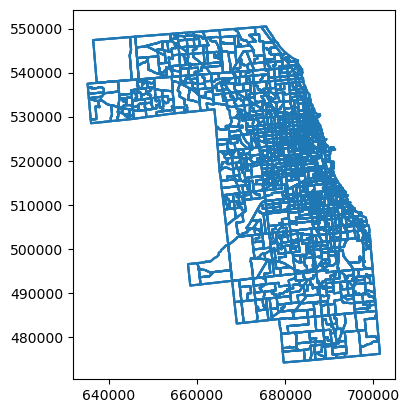

In [7]:
megatract_DFCHI.boundary.plot()

In [8]:
#define projection for megatract: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
megatract_DFCHI.set_crs((chi2010.crs), inplace=True)
print(megatract_DFCHI.crs)

#export megatract
megatract_DFCHI.to_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/Redlining/Data/Census/Cleaned/megatractCHI_20241217.shp')

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


C:\Users\mstuhlm1\AppData\Local\Temp\ipykernel_15172\2623573909.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  megatract_DFCHI.to_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/Redlining/Data/Census/Cleaned/megatractCHI_20241217.shp')
